# Airline Risk Analysis Project

### Flatiron Data Science Bootcamp Phase 1 Project

### June 4, 2023

</br>

---

## Team Members

- Lillian Lakes (Technical Lead)

> - Email: lillian.lakes@gmail.com
> - [Lillian's GitHub Profile](https://github.com/lillianlakes)

- Rajesh Reddy (Presentation Lead)

> - Email: rredd002@gmail.com 
> - [Lillian's GitHub Profile](https://github.com/rredd002)

- Madeleine Smithers (GitHub Lead)

> - Email: madeleinedsmithers@gmail.com
> - [Lillian's GitHub Profile](https://github.com/MaddieSmithers)

</br>

---

## Project Links

For more information on our project, please view our:

- [Project Presentation Video](https://youtu.be/TvrjEL8AaEg)

- [Project GitHub Page](https://github.com/MaddieSmithers/Aircraft-Risk-Analysis)

- [Project Tableau Dashboard](https://public.tableau.com/app/profile/rajesh.reddy5034)

---

## Business Problem

Our company is expanding in to new industries to diversify its portfolio. Specifically, we are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. We are charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. We will translate our findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.

---

## Main Findings

**A commercial airline passenger is 75.69% less likely to die in a deadly crash.**

- It is less risky to purchase and operate commercial aircrafts

- Of the commercial aircraft manufacturers, Boeing is the least risky to purchase from

- Of the Boeing aircraft models, the 737 and 777 are the least fatal and harmful 

- If our company chooses to also purchase and operate private aircraft models, we would recommend the Cessna 172 and Cessna 182 as the least fatal and harmful 

- If our company would like alternate private models, we would recommend the Cirrus SR20 and Cirrus SR22

---

## Data Overview

For our analysis, we use the National Transportation Safety Board (NTSB) aviation accident database from Kaggle.

It contains over 88,000 data points on reports of civil aviation accident and incidents that occurred in the United States, U.S. Territories, or international waters, from 1962 to 2022. 

After cleaning our data, we show that the number of airplane accidents by year rise until about 2009, then remain relatively steady. We found several articles on airline safety regulations changing in 2009, that back 2009 as a turning point in aircraft safety so we use 2009 as a cut-off and only filter data after 2009 (https://www.cnbc.com/2019/02/13/colgan-air-crash-10-years-ago-reshaped-us-aviation-safety.html).

The main categories of data that are relevant for our analysis are:

- Details of the specific aircraft, including the make and model

- Results of the incident, including the severity of harm to passengers and damage to the aircraft

There is also data we do not use, such as:

- Where and when the accident occurred, often by state or latitude and longitude

- External factors, such as weather or airport code

There is some data that would have been nice to analyze:

- For example, if we had the total flights for each make and model across the time span, we could calculate the accident risk per flight as the ratio between the number of accidents in a given year and the number of flights conducted during that same year. 
  
- The data also does not include information on the cost of planes or potential revenue of commercial vs private, which would be a key factor in buying aircrafts despite any accident risk.

---
## Preliminary Data Processing Steps

Before data cleaning, imputation, exploratory data analysis, and visualizations of the date we have, we need to:

- Import package dependencies

- Ensure the necessary files are present

- Import the necessary files

In [1]:
# Import packages that we will use for data cleaning, imputation, analysis, and visualization

import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
# View directory to make ensure necessary files are present

!ls

AviationData.csv            USState_Codes.csv
AviationDataClean.csv       aviation_notebook.ipynb
AviationDataCleanV2.csv     data_cleaning_lillian.ipynb
AviationDataCleanV3.csv     data_cleaning_maddie.ipynb
MaddieEDA.ipynb             data_cleaning_raj.ipynb
README.md


In [3]:
# Import AviationData file

aviation = pd.read_csv('AviationData.csv', encoding='ISO-8859-1', parse_dates=['Event.Date', 'Publication.Date'])

In [4]:
# Import USState_Codes file

us_state_codes = pd.read_csv('USState_Codes.csv')
us_state_codes.head()

,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


---
## Preliminary Data Exploration

Before we start data cleaning and imputation, we need to understand the data

In [5]:
# Explore the first five rows of the data to understand what the fields and data are

aviation.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaT
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,1996-09-19
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,2007-02-26
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,2000-12-09
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,1980-04-16


In [6]:
# Explore the last five rows of the data to further understand the data

aviation.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,2022-12-29
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaT
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,2022-12-27
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaT
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,2022-12-30


In [7]:
# Generate descriptive statistics to further understand the data, including count, measures of central tendency, measures of dispersion and measures of range

aviation.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [8]:
# Print a concise summary of the DataFrame to understand the number of rows and columns, the data types and the number of null values within each column

aviation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88889 non-null  object        
 1   Investigation.Type      88889 non-null  object        
 2   Accident.Number         88889 non-null  object        
 3   Event.Date              88889 non-null  datetime64[ns]
 4   Location                88837 non-null  object        
 5   Country                 88663 non-null  object        
 6   Latitude                34382 non-null  object        
 7   Longitude               34373 non-null  object        
 8   Airport.Code            50249 non-null  object        
 9   Airport.Name            52790 non-null  object        
 10  Injury.Severity         87889 non-null  object        
 11  Aircraft.damage         85695 non-null  object        
 12  Aircraft.Category       32287 non-null  object

In [9]:
# Understand the breakdown of missing values within each column

aviation.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

---
## Data Cleaning and Imputation

Before we begin exploratory data analysis and create visualizations, we need to clean the dataset and impute some values

In [10]:
# Calculate the number of duplicate values in the Event.Id column
# Found 938 duplicate Event.Ids

aviation.duplicated(subset='Event.Id').value_counts()

False    87951
True       938
dtype: int64

In [11]:
# Drop duplicate records in the Event.Id column

aviation.drop_duplicates(subset='Event.Id', inplace=True)

In [12]:
# Understand the breakdown and meaning of records in the Investigation.Type column

"""
Aircraft accident means an occurrence associated with the operation of an aircraft which takes place between the time any person boards the aircraft with the intention of flight and all such persons have disembarked, and in which any person suffers death or serious injury, or in which the aircraft receives substantial damage

Incident means an occurrence other than an accident, associated with the operation of an aircraft, which affects 

Source: https://www.govinfo.gov/content/pkg/CFR-2011-title49-vol7/pdf/CFR-2011-title49-vol7-sec830-2.pdf
"""

aviation['Investigation.Type'].value_counts()

Accident    84190
Incident     3761
Name: Investigation.Type, dtype: int64

In [13]:
# Understand the breakdown of records in the Accident.Number column

aviation['Accident.Number'].value_counts()

ANC96LA084    1
NYC85FA092    1
WPR10LA247    1
CHI85LA255    1
WPR20CA149    1
             ..
IAD00IA032    1
ERA17WA009    1
ERA16FA269    1
ERA10LA351    1
LAX97LA192    1
Name: Accident.Number, Length: 87951, dtype: int64

In [14]:
aviation.duplicated(subset='Accident.Number').value_counts()

False    87951
dtype: int64

In [15]:
# Create year, month and day columns from records in the Event.Date column using DateTime methods

aviation['Event.Year'] = aviation['Event.Date'].dt.year
aviation['Event.Month'] = aviation['Event.Date'].dt.month
aviation['Event.Day'] = aviation['Event.Date'].dt.day

In [16]:
# Create a new dataframe of incidents by year to understand how the number of incidents vary over time

incidents_by_year = aviation['Event.Year'].value_counts()
incidents_by_year = incidents_by_year.sort_index()
incidents_by_year

1948       1
1962       1
1974       1
1977       1
1979       2
1981       1
1982    3547
1983    3513
1984    3406
1985    3053
1986    2832
1987    2773
1988    2685
1989    2502
1990    2480
1991    2420
1992    2328
1993    2285
1994    2229
1995    2278
1996    2150
1997    2121
1998    2196
1999    2174
2000    2183
2001    2032
2002    2001
2003    2063
2004    1932
2005    2001
2006    1826
2007    1984
2008    1893
2009    1783
2010    1786
2011    1850
2012    1835
2013    1561
2014    1535
2015    1582
2016    1664
2017    1638
2018    1681
2019    1624
2020    1392
2021    1545
2022    1581
Name: Event.Year, dtype: int64

Text(0.5, 0, 'Years')

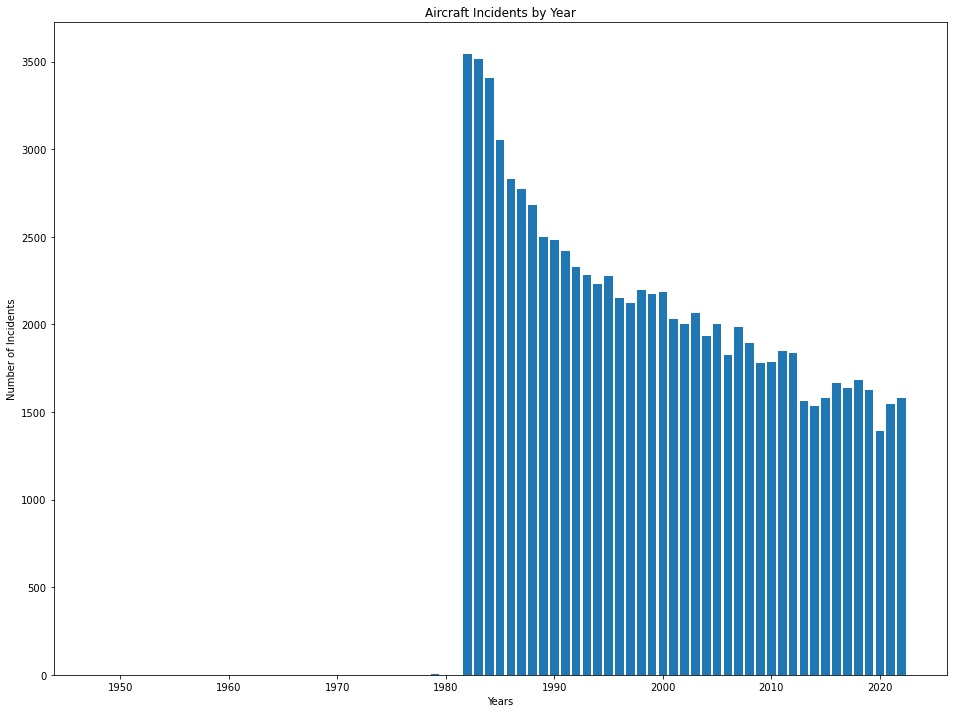

In [17]:
# Graph the number of incidents by year to gauge potential year cutoff points

years = list(incidents_by_year.index)
incidents = list(incidents_by_year.values)

fig, ax = plt.subplots(figsize=(16, 12))

ax.bar(years, incidents)
ax.set_title("Aircraft Incidents by Year")
ax.set_ylabel("Number of Incidents")
ax.set_xlabel("Years")


In [18]:
# View incidents in the United States only

aviation.loc[(aviation['Country'] != 'United States')]

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Event.Year,Event.Month,Event.Day
36,20020917X02410,Accident,MIA82FKA05,1982-01-04,SAINT CROIX,NaN,NaN,NaN,STX,ALEXANDER HAMILTON,...,0.0,1.0,0.0,VMC,Taxi,Probable Cause,1983-04-01,1982,1,4
237,20020917X02008,Accident,FTW82DA055,1982-02-04,GULF OF MEXICO,GULF OF MEXICO,NaN,NaN,SS87,SHIP SHOAL 87,...,0.0,0.0,1.0,VMC,Takeoff,Probable Cause,1983-04-02,1982,2,4
333,20020917X02346,Accident,MIA82DA047,1982-02-15,SAN JUAN,Puerto Rico,NaN,NaN,SJU,SAN JUAN INTL,...,0.0,0.0,1.0,VMC,Approach,Probable Cause,1983-02-15,1982,2,15
402,20020917X02367,Accident,MIA82DA077,1982-02-23,ATLANTIC OCEAN,ATLANTIC OCEAN,NaN,NaN,NaN,NaN,...,2.0,0.0,0.0,VMC,Cruise,Probable Cause,1983-02-23,1982,2,23
463,20020917X02025,Accident,FTW82DA075,1982-03-02,HIGH ISLAND BLK,HIGH ISLAND,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,VMC,Approach,Probable Cause,1983-02-03,1982,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88850,20221219106471,Accident,GAA23WA043,2022-12-05,"PONTA GROSSA,",Brazil,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,NaN,NaN,NaN,2022-12-20,2022,12,5
88851,20221222106485,Incident,DCA23WA100,2022-12-05,"Bangkok,",Thailand,NaN,NaN,NaN,NaN,...,0.0,0.0,102.0,NaN,NaN,NaN,2022-12-22,2022,12,5
88863,20221213106449,Accident,GAA22WA311,2022-12-11,"Kildare,",Ireland,NaN,NaN,EIKH,NaN,...,0.0,0.0,0.0,NaN,NaN,NaN,NaT,2022,12,11
88872,20221214106459,Accident,GAA23WA042,2022-12-14,"Happy Valley-Goose Bay, OF",Canada,NaN,NaN,NaN,NaN,...,0.0,2.0,0.0,NaN,NaN,NaN,2022-12-20,2022,12,14


In [19]:
# Create a State column from records in Location column using the string split method

aviation['State'] = aviation['Location'].str.split(", ").str[1]

In [20]:
# Update records in the State column for non-US locations

aviation.loc[aviation['Country'] != 'United States', 'State'] = 'non-US'

In [21]:
# Understand the breakdown of records in the State column

aviation['State'].value_counts()

CA        8700
non-US    6596
TX        5839
FL        5732
AK        5625
          ... 
NYC          1
MG           1
CB           1
Oahu         1
MANU'A       1
Name: State, Length: 72, dtype: int64

In [22]:
# Understand the breakdown of the 25 least frequent records in the State column to gauge those that need to be cleaned

aviation['State'].value_counts(sort=True, ascending=True)[:25]

MANU'A            1
Oahu              1
CB                1
MG                1
NYC               1
LA,               1
HONOLULU          1
San Juan Is.      1
Maui              2
UN                3
MAUI              4
OAHU              4
KAUAI             5
VI                6
GU                8
PO               14
OF               15
AO               17
DC               40
GM               44
DE              112
PR              113
RI              155
VT              238
NH              366
Name: State, dtype: int64

In [23]:
# Further explore records in the Location and State columns that need to be cleaned

# 1 record that is AO
aviation.loc[(aviation['Location'] == 'Atlantic Ocean')]

# 1 record that is AS
aviation.loc[(aviation['State'] == "MANU'A")]

# 1 record that is CA
aviation.loc[(aviation['State'] == 'LA,')]

# 2 records that are Unknown and 1 that is GM
aviation.loc[(aviation['State'] == 'UN')]

# 16 records that are HI
aviation.loc[(aviation['State'] == 'MAUI') | (aviation['State'] == 'Maui') | (aviation['State'] == 'OAHU') | (aviation['State'] == 'KAUAI') | (aviation['State'] == 'HONOLULU')]

# records that are non-US
aviation.loc[(aviation['State'] == 'MG') | (aviation['State'] == 'OF')]

# 1 record that is NY
aviation.loc[(aviation['State'] == 'NYC')]

# 1 record that is PR
aviation.loc[(aviation['State'] == 'San Juan Is.')]

# 1 record that is VI
aviation.loc[(aviation['State'] == 'CB')]

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Event.Year,Event.Month,Event.Day,State
85869,20210216102634,Accident,ERA21FA130,2021-02-15,"St Thomas, CB",United States,182116N,0065140W,NaN,NaN,...,0.0,0.0,VMC,NaN,NaN,2021-02-26,2021,2,15,CB


In [24]:
# Clean records in the State column

# Change record to AO
aviation.loc[(aviation['Location'] == 'Atlantic Ocean, OF'), 'State'] = 'AO'

# Change record to AS
aviation.loc[(aviation['State'] == "MANU'A"), 'State'] = 'AS'

# Change record to CA
aviation.loc[(aviation['State'] == 'LA,'), 'State'] = 'CA'

# Change record to GM
aviation.loc[(aviation['Location'] == 'GULF OF MEXICO, UN'), 'State'] = 'GM'

# Change records to HI
aviation.loc[(aviation['State'] == 'MAUI') | (aviation['State'] == 'Maui') | (aviation['State'] == 'OAHU') | (aviation['State'] == 'Oahu') | (aviation['State'] == 'KAUAI') | (aviation['State'] == 'HONOLULU'), 'State'] = 'HI'

# # Change record to non-US
aviation.loc[((aviation['State'] == 'MG') | (aviation['State'] == 'OF')) & (aviation['Location'] != 'Atlantic Ocean, OF'), 'State'] = 'non-US'

# Change record to NY
aviation.loc[(aviation['State'] == 'NYC'), 'State'] = 'NY'

# Change record to PR
aviation.loc[(aviation['State'] == 'San Juan Is.'), 'State'] = 'PR'

# Change record to Unknown
aviation.loc[(aviation['Location'] == 'Missing, UN') | (aviation['Location'] == 'Oceanic, UN'), 'State'] = 'Unknown'

# Change record to VI
aviation.loc[(aviation['State'] == 'CB'), 'State'] = 'VI'

In [25]:
# Verify all State records are cleaned

aviation['State'].value_counts()

CA         8701
non-US     6611
TX         5839
FL         5732
AK         5625
AZ         2804
CO         2702
WA         2578
IL         2022
MI         2018
GA         2006
NY         1875
OH         1804
PA         1776
OR         1765
NC         1649
MO         1554
WI         1531
AR         1510
MN         1447
ID         1434
NM         1350
UT         1331
IN         1311
VA         1267
OK         1224
NV         1216
LA         1204
AL         1143
NJ         1141
KS         1098
TN         1096
MT         1047
SC          970
MA          953
IA          814
MS          810
MD          807
WY          733
NE          719
KY          650
ND          559
ME          502
CT          500
HI          492
SD          444
WV          394
NH          366
VT          238
RI          155
PR          114
DE          112
GM           45
DC           40
AO           18
PO           14
GU            8
VI            7
Unknown       2
AS            1
Name: State, dtype: int64

In [26]:
# Verify only Unknown and/or non-US state locations appear in cleaned State records if the state is not present in the us_state_codes dateframe

invalid_state_locations = []

for state in list(aviation['State'].value_counts().index):
  if state not in list(us_state_codes['Abbreviation']):
    invalid_state_locations.append(state)

invalid_state_locations

['non-US', 'Unknown']

In [27]:
# Understand the breakdown of missing and non-null values in the Country column

aviation['Country'].isna().value_counts()

False    87729
True       222
Name: Country, dtype: int64

In [28]:
# Explore missing records in the Country column that need to be imputed

# Note: Once we change our year cutoff to 2009, records with blank countries will no longer be in the dataset

blank_countries = set(aviation.loc[(aviation['Country'].isna())]['Location'])
blank_countries

{'BRAZORIA 440L',
 'BRAZOS 542',
 'BUCCANEER OIL F',
 'CABO ROJO',
 'CAMERON 278B',
 'CAROLINA',
 'CATANO',
 'CAYEY',
 'CHARLOTTE AMALI',
 'CHRISTIANSTED',
 'CHUUK ISLAND',
 'CIALES',
 'COMERIO',
 'CULEBRA',
 'CULEBRA ISLAND',
 'CURACAO',
 'Canada/US borde',
 'DORADO',
 'E BRAKE BLK 397',
 'E CAMERON BLK 2',
 'E. CAMERON',
 'E. ISLAND BLK15',
 'E.I. BLK 108',
 'EAST CAMERON',
 'EAST CAMERON 71',
 'EUGENE IS 296B',
 'EUGENE IS. 193',
 'EUGENE IS. 313',
 'EUGENE ISL.BLK',
 'EUGENE ISLAND',
 'FAJARDO',
 'GARDEN BANKS',
 'GILBERT ISLANDS',
 'GRAND ISLE',
 'GRAND ISLE B43Q',
 'GRAND ISLE BL73',
 'GRAND ISLE BLK',
 'GREEN CANYON172',
 'GUAM',
 'GUANTANAMO',
 'GUAYAMA',
 'GULF OF CA',
 'GURABO',
 'GUVATE',
 'Guam',
 'HARMON FIELD',
 'HUMA CAO',
 'HUMACAO',
 'ISABELA',
 'ISBELA SEGUNDA',
 'ISLA GRANDE',
 'ISLA VERDE',
 'JOHANNESBURG',
 'LAJAS',
 'LARES',
 'LAS PIEDRAS',
 'LEVITTOWN',
 'LOIZA',
 'LUQUILLO',
 'London Control',
 'MAIN PASS 225A',
 'MANATI',
 'MATAGORDA 526',
 'MATAGORDA 665',
 'M

In [29]:
# Fix Country records for US locations with blank Country records

valid_US_locations = [
 'CHARLOTTE AMALI',
 'CHRISTIANSTED',
'FAJARDO',
 'GUAM',
'GUAYAMA',
'Guam',
'NEAR SAN JUAN',
 'NEAR ST. CROIX',
 'NO.ATLANTIC OC',
 'SAINT CROIX',
 'ST CROIX',
 'ST THOMAS',
 'ST. CROIX',
 'ST. THOMAS',
 'ST.THOMAS',
 'STAKE ISLAND',
 'VIEQUES']

aviation.loc[(aviation['Location'].isin(valid_US_locations)), 'Country'] = 'United States'

In [30]:
# Fix State records for US locations with blank Country records

valid_VI_locations = [
'CHARLOTTE AMALI',
 'CHRISTIANSTED',
'NEAR ST. CROIX',
'SAINT CROIX',
 'ST CROIX',
 'ST THOMAS',
 'ST. CROIX',
 'ST. THOMAS',
'ST.THOMAS',
'VIEQUES']

valid_PR_locations = [
'FAJARDO',
'GUAYAMA',
'NEAR SAN JUAN']

valid_GM_locations = [
 'GUAM',
'Guam']

valid_AO_locations = [
'NO.ATLANTIC OC']

valid_MS_locations = [
'STAKE ISLAND']

aviation.loc[(aviation['Location'].isin(valid_VI_locations)), 'State'] = 'VI'
aviation.loc[(aviation['Location'].isin(valid_PR_locations)), 'State'] = 'PR'
aviation.loc[(aviation['Location'].isin(valid_GM_locations)), 'State'] = 'GM'
aviation.loc[(aviation['Location'].isin(valid_AO_locations)), 'State'] = 'SO'
aviation.loc[(aviation['Location'].isin(valid_MS_locations)), 'State'] = 'MS'



In [31]:
# Understand the breakdown of records in the Amateur.Built column

aviation['Amateur.Built'].value_counts()

No     79431
Yes     8420
Name: Amateur.Built, dtype: int64

In [32]:
# Remove amateur built aicraft records from the dataset

aviation = aviation[aviation['Amateur.Built'] == 'No']

In [33]:
"""
Drop irrelevant columns

- Accident.Number and Registration.Number: We do not need these fields for our analysis, as we already have an index
- Latitude, Longitude, Airport.Code, and Airport.Name: While these may be relevant for detailed location analysis, we are not analyzing location in the first phase of our project  
- Amateur.Built: Since we excluded amateur-built aircrafts from our dataset, we do not need this field
- FAR.Description: While the relevant Federal Aviation Regulation codes may help future analysis, we do not need them for the first phase of our project
- Publication.Date: The date each incident was published is irrelevant to our analysis since we have Event.Date
- Schedule and Air.carrier: Although it is possible that the schedule of each flight and the air carrier may be dependent variables that affect accident risk, we have other variables that more strongly impact fatality and injury rates
"""

aviation.drop(columns=['Accident.Number', 'Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Registration.Number', 'Amateur.Built', 'FAR.Description', 'Schedule', 'Publication.Date', 'Air.carrier'], inplace=True)

In [34]:
# Understand the breakdown of records in the Injury.Severity column
# Note: We no longer have records with format 'Fatal(#)' after later dropping records with Event.Year prior to 2009

aviation['Injury.Severity'].value_counts()

Non-Fatal     60796
Fatal(1)       4872
Fatal          4554
Fatal(2)       3236
Incident       2046
              ...  
Fatal(107)        1
Fatal(96)         1
Fatal(141)        1
Fatal(156)        1
Fatal(143)        1
Name: Injury.Severity, Length: 106, dtype: int64

In [35]:
# Understand the breakdown of records in the Aircraft.damage column

aviation['Aircraft.damage'].value_counts()

Substantial    57452
Destroyed      16205
Minor           2601
Unknown          116
Name: Aircraft.damage, dtype: int64

In [36]:
# Understand the breakdown of records in the Aircraft.Category column

aviation['Aircraft.Category'].value_counts()

Airplane             24324
Helicopter            3290
Glider                 473
Balloon                229
Weight-Shift           139
Powered Parachute       83
Gyrocraft               32
Ultralight              18
Unknown                 11
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
Rocket                   1
Name: Aircraft.Category, dtype: int64

In [37]:
# Keep only records with an Airplane Aircraft.Category in the dataset

aviation = aviation[aviation['Aircraft.Category'] == 'Airplane']

In [38]:
# Understand the breakdown of records in the Make column

aviation['Make'].value_counts()

CESSNA                4860
Cessna                3549
PIPER                 2803
Piper                 1885
BOEING                1027
                      ... 
BLUE SIDE UP INC         1
TUTTLE BRUCE C           1
BUCKEYE INDUSTRIES       1
Liberty Aerospace        1
Tetrault Ronad           1
Name: Make, Length: 1381, dtype: int64

In [39]:
# Convert all records in the Make column to title case strings for easier cleaning

aviation['Make'] = aviation.Make.astype(str).str.title()

In [40]:
# Convert all records in Make column to an object data type

aviation['Make'] = aviation['Make'].astype(object)

In [41]:
# Better understand records that need to be cleaned in the Make column by looking at Boeing records as a subset

# Boeing is listed in several different formats in the data i.e 'The Boeing Company'. This code checks all records in the Make column for substring
# 'Boeing' and changes the value to standard 'Boeing'

aviation['Make'].loc[aviation['Make'].str.contains('Boeing')] = 'Boeing'

In [42]:
# Create a function normalize_company_names to clean records in the Make column

def normalize_company_names(df, column_name, company_name):
    '''Takes in df dataframe, checks every value in column_name for substring company_name
        If substring company_name exists, the value of the row is overwritten to company_name.
        Then returns the new df dataframe'''
    df[column_name].loc[df[column_name].str.contains(company_name)] = company_name
    return df

In [43]:
# Check the normalize_company_names unction by normalizing all companies names related to 'Piper'

normalize_company_names(aviation, 'Make', 'Piper')

,Event.Id,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,...,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Event.Year,Event.Month,Event.Day,State
5,20170710X52551,Accident,1979-09-17,"BOSTON, MA",United States,Non-Fatal,Substantial,Airplane,Mcdonnell Douglas,DC9,...,NaN,1.0,44.0,VMC,Climb,Probable Cause,1979,9,17,MA
7,20020909X01562,Accident,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,Airplane,Cessna,140,...,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,1982,1,1,WA
8,20020909X01561,Accident,1982-01-01,"EAST HANOVER, NJ",United States,Non-Fatal,Substantial,Airplane,Cessna,401B,...,0.0,0.0,2.0,IMC,Landing,Probable Cause,1982,1,1,NJ
12,20020917X02148,Accident,1982-01-02,"HOMER, LA",United States,Non-Fatal,Destroyed,Airplane,Bellanca,17-30A,...,0.0,1.0,0.0,IMC,Cruise,Probable Cause,1982,1,2,LA
13,20020917X02134,Accident,1982-01-02,"HEARNE, TX",United States,Fatal(1),Destroyed,Airplane,Cessna,R172K,...,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,1982,1,2,TX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88869,20221213106455,Accident,2022-12-13,"Lewistown, MT",United States,Non-Fatal,Substantial,Airplane,Piper,PA42,...,0.0,0.0,1.0,NaN,NaN,NaN,2022,12,13,MT
88873,20221215106463,Accident,2022-12-14,"San Juan, PR",United States,Non-Fatal,Substantial,Airplane,Cirrus Design Corp,SR22,...,0.0,0.0,1.0,VMC,NaN,NaN,2022,12,14,PR
88876,20221219106475,Accident,2022-12-15,"Wichita, KS",United States,Non-Fatal,Substantial,Airplane,Swearingen,SA226TC,...,0.0,0.0,1.0,NaN,NaN,NaN,2022,12,15,KS
88877,20221219106470,Accident,2022-12-16,"Brooksville, FL",United States,Minor,Substantial,Airplane,Cessna,R172K,...,1.0,0.0,0.0,VMC,NaN,NaN,2022,12,16,FL


In [44]:
# Normalize the company names of the top airline manufacturers using the normalize_company_names function we created

normalize_company_names(aviation, 'Make', 'Boeing')
normalize_company_names(aviation, 'Make', 'Airbus')
normalize_company_names(aviation, 'Make', 'Cessna')
normalize_company_names(aviation, 'Make', 'Beech')
normalize_company_names(aviation, 'Make', 'Cirrus')

,Event.Id,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,...,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Event.Year,Event.Month,Event.Day,State
5,20170710X52551,Accident,1979-09-17,"BOSTON, MA",United States,Non-Fatal,Substantial,Airplane,Mcdonnell Douglas,DC9,...,NaN,1.0,44.0,VMC,Climb,Probable Cause,1979,9,17,MA
7,20020909X01562,Accident,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,Airplane,Cessna,140,...,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,1982,1,1,WA
8,20020909X01561,Accident,1982-01-01,"EAST HANOVER, NJ",United States,Non-Fatal,Substantial,Airplane,Cessna,401B,...,0.0,0.0,2.0,IMC,Landing,Probable Cause,1982,1,1,NJ
12,20020917X02148,Accident,1982-01-02,"HOMER, LA",United States,Non-Fatal,Destroyed,Airplane,Bellanca,17-30A,...,0.0,1.0,0.0,IMC,Cruise,Probable Cause,1982,1,2,LA
13,20020917X02134,Accident,1982-01-02,"HEARNE, TX",United States,Fatal(1),Destroyed,Airplane,Cessna,R172K,...,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,1982,1,2,TX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88869,20221213106455,Accident,2022-12-13,"Lewistown, MT",United States,Non-Fatal,Substantial,Airplane,Piper,PA42,...,0.0,0.0,1.0,NaN,NaN,NaN,2022,12,13,MT
88873,20221215106463,Accident,2022-12-14,"San Juan, PR",United States,Non-Fatal,Substantial,Airplane,Cirrus,SR22,...,0.0,0.0,1.0,VMC,NaN,NaN,2022,12,14,PR
88876,20221219106475,Accident,2022-12-15,"Wichita, KS",United States,Non-Fatal,Substantial,Airplane,Swearingen,SA226TC,...,0.0,0.0,1.0,NaN,NaN,NaN,2022,12,15,KS
88877,20221219106470,Accident,2022-12-16,"Brooksville, FL",United States,Minor,Substantial,Airplane,Cessna,R172K,...,1.0,0.0,0.0,VMC,NaN,NaN,2022,12,16,FL


In [45]:
# Understand the breakdown of incidents for the top 20 aircraft manufacturers in the Make column

aviation['Make'].value_counts()[0:20]

Cessna               8467
Piper                4757
Beech                1756
Boeing               1319
Mooney                416
Cirrus                401
Bellanca              281
Airbus                281
Grumman               245
Maule                 232
Aeronca               227
Air Tractor           223
Air Tractor Inc       219
Champion              169
Luscombe              163
Embraer               154
Stinson               145
North American        118
Mcdonnell Douglas     111
Taylorcraft           109
Name: Make, dtype: int64

In [46]:
# Understand the breakdown of records in the Model column

aviation['Model'].value_counts()

172                 866
152                 444
737                 401
182                 343
172N                312
                   ... 
SONEX TRIGEAR         1
OTW 160               1
KITFOX SPEEDSTER      1
M-7-420AC             1
PA 31-310             1
Name: Model, Length: 3768, dtype: int64

In [47]:
# Understand the breakdown of missing and non-null values in the Model column

aviation['Model'].isna().value_counts()

False    24306
True        18
Name: Model, dtype: int64

In [48]:
# Understand the breakdown of records in the Number.of.Engines column

aviation['Number.of.Engines'].value_counts()

1.0    18168
2.0     3448
4.0       99
3.0       58
0.0        9
6.0        1
8.0        1
Name: Number.of.Engines, dtype: int64

In [49]:
# Understand the breakdown of missing and non-null values in the Number.of.Engines column

aviation['Number.of.Engines'].isna().value_counts()

False    21784
True      2540
Name: Number.of.Engines, dtype: int64

In [50]:
# Understand the breakdown of records in the Engine.Type column

aviation['Engine.Type'].value_counts()

Reciprocating      17799
Turbo Prop          1324
Turbo Fan            955
Turbo Jet            150
Unknown              133
Geared Turbofan       12
Turbo Shaft           10
Electric               5
UNK                    1
Name: Engine.Type, dtype: int64

In [51]:
# Understand the breakdown of missing and non-null values in the Engine.Type column

aviation['Engine.Type'].isna().value_counts()

False    20389
True      3935
Name: Engine.Type, dtype: int64

In [52]:
# Understand the breakdown of records in the Purpose.of.flight column

aviation['Purpose.of.flight'].value_counts()

Personal                     13314
Instructional                 3104
Aerial Application            1062
Unknown                        824
Business                       757
Positioning                    349
Aerial Observation             170
Skydiving                      165
Ferry                          163
Other Work Use                 154
Executive/corporate            147
Flight Test                    120
Banner Tow                      89
Public Aircraft - Federal       52
Air Race show                   48
Public Aircraft                 42
Glider Tow                      35
Public Aircraft - State         24
Firefighting                    17
Public Aircraft - Local         12
ASHO                             4
Air Race/show                    4
PUBS                             3
Air Drop                         3
External Load                    1
Name: Purpose.of.flight, dtype: int64

In [53]:
# Understand the breakdown of records in the Total.Fatal.Injuries column

aviation['Total.Fatal.Injuries'].value_counts()

0.0      17174
1.0       2061
2.0       1288
3.0        406
4.0        301
         ...  
58.0         1
131.0        1
162.0        1
90.0         1
27.0         1
Name: Total.Fatal.Injuries, Length: 65, dtype: int64

In [54]:
# Understand the breakdown of missing and non-null values in the Country column

aviation['Total.Fatal.Injuries'].isna().value_counts()

False    21576
True      2748
Name: Total.Fatal.Injuries, dtype: int64

In [55]:
# Understand the breakdown of records in the Total.Minor.Injuries column

aviation['Total.Minor.Injuries'].value_counts()

0.0      18671
1.0       2193
2.0        654
3.0        134
4.0         63
5.0         22
6.0         14
7.0         10
8.0          3
9.0          3
17.0         2
19.0         2
13.0         2
14.0         2
10.0         2
47.0         1
200.0        1
27.0         1
33.0         1
25.0         1
16.0         1
12.0         1
50.0         1
24.0         1
40.0         1
42.0         1
22.0         1
18.0         1
Name: Total.Minor.Injuries, dtype: int64

In [56]:
# Understand the breakdown of missing and non-null values in the Total.Minor.Injuries column

aviation['Total.Minor.Injuries'].isna().value_counts()

False    21790
True      2534
Name: Total.Minor.Injuries, dtype: int64

In [57]:
# Understand the breakdown of records in the Total.Serious.Injuries column

aviation['Total.Serious.Injuries'].value_counts()

0.0      18122
1.0       2176
2.0        835
3.0        171
4.0         96
5.0         23
6.0         17
7.0         11
8.0          8
9.0          8
10.0         7
11.0         5
14.0         2
12.0         2
26.0         2
21.0         2
25.0         2
41.0         1
137.0        1
125.0        1
28.0         1
53.0         1
34.0         1
19.0         1
88.0         1
63.0         1
22.0         1
20.0         1
33.0         1
161.0        1
35.0         1
67.0         1
44.0         1
27.0         1
13.0         1
47.0         1
Name: Total.Serious.Injuries, dtype: int64

In [58]:
# Understand the breakdown of missing and non-null values in the Total.Serious.Injuries column

aviation['Total.Serious.Injuries'].isna().value_counts()

False    21508
True      2816
Name: Total.Serious.Injuries, dtype: int64

In [59]:
# Understand the breakdown of records in the Total.Uninjured column

aviation['Total.Uninjured'].value_counts()

0.0      8328
1.0      7205
2.0      4692
3.0      1130
4.0       677
         ... 
87.0        1
588.0       1
274.0       1
248.0       1
62.0        1
Name: Total.Uninjured, Length: 308, dtype: int64

In [60]:
# Understand the breakdown of missing and non-null values in the Total.Uninjured column

aviation['Total.Uninjured'].isna().value_counts()

False    23615
True       709
Name: Total.Uninjured, dtype: int64

In [61]:
# Create a Total.Passengers column by summing up respective records in the Total.Fatal.Injuries, Total.Minor.Injuries, Total.Serious.Injuries and Total.Uninjured columns

aviation['Total.Passengers'] = aviation['Total.Fatal.Injuries'] + aviation['Total.Minor.Injuries'] + aviation['Total.Serious.Injuries'] + aviation['Total.Uninjured']

In [62]:
# Understand the breakdown of records in the Total.Passengers column

aviation['Total.Passengers'].value_counts()

1.0      8844
2.0      6777
3.0      1754
4.0      1192
0.0       850
         ... 
348.0       1
69.0        1
229.0       1
311.0       1
263.0       1
Name: Total.Passengers, Length: 298, dtype: int64

In [63]:
# Create a Percent.Fatalities column by dividing the respective records in the Total.Fatal.Injuries column by the Total.Passenger value
aviation['Percent.Fatalities'] = aviation['Total.Fatal.Injuries'] / aviation['Total.Passengers']

In [64]:
# Understand the breakdown of records in the Percent.Fatalities column

aviation['Percent.Fatalities'].value_counts()

0.000000    16324
1.000000     3403
0.500000      362
0.333333       92
0.666667       70
            ...  
0.875000        1
0.140187        1
0.888889        1
0.991150        1
0.777778        1
Name: Percent.Fatalities, Length: 62, dtype: int64

In [65]:
# Create a Percent.Passengers.Harmed column by dividing the total passengers killed or injured by the total passengers for each incident
aviation['Percent.Passengers.Harmed'] = (aviation['Total.Fatal.Injuries'] + aviation['Total.Minor.Injuries'] + aviation['Total.Serious.Injuries']) / aviation['Total.Passengers']

In [66]:
# Understand the breakdown of records in the Percent.Passengers.Harmed column

aviation['Percent.Passengers.Harmed'].value_counts()

0.000000    11772
1.000000     7478
0.500000      501
0.333333      123
0.666667       72
            ...  
0.010363        1
0.148649        1
0.029740        1
0.026144        1
0.669291        1
Name: Percent.Passengers.Harmed, Length: 269, dtype: int64

In [67]:
# Understand the breakdown and meaning of records in the Weather.Condition column

"""
VMC stands for “visual meteorological conditions”. VMC conditions describe the weather conditions and situations in which a pilot can sufficiently and safely maintain visuals of all other aircraft and the terrain around them. 
IMC is “instrument meteorological conditions”. MC conditions describe a situation in which visibility and the weather require the pilot to rely on their instruments, and thus conduct an IFR flight.
IFR stands for “instrument flight rules” and are utilized in situations where the weather or visibility is poor enough to warrant relying on the aircraft instruments only to maintain a safe flight. With both rule sets, the weather will decide what the pilot uses.
Source: https://www.aerospaceexchange.com/blog/what-do-vmc-and-imc-mean-to-the-pilot
"""

aviation['Weather.Condition'].value_counts()


VMC    19633
IMC     1358
Unk      215
UNK      148
Name: Weather.Condition, dtype: int64

In [68]:
# Understand the breakdown of missing and non-null values in the Weather.Condition column

aviation['Weather.Condition'].isna().value_counts()

False    21354
True      2970
Name: Weather.Condition, dtype: int64

In [69]:
# Understand the breakdown of records in the Broad.phase.of.flight column

aviation['Broad.phase.of.flight'].value_counts()

Landing        2069
Takeoff        1127
Cruise          749
Approach        543
Maneuvering     449
Taxi            214
Descent         160
Climb           142
Go-around       141
Standing         70
Unknown          54
Other            11
Name: Broad.phase.of.flight, dtype: int64

In [70]:
# Drop the Broad.Phase.of.Flight column as there are too many null values and no records from 2009 and beyond

aviation.drop(columns=['Broad.phase.of.flight'], inplace=True)

In [71]:
# Understand the breakdown of records in the Report.Status column

aviation['Report.Status'].value_counts()

Probable Cause                                                                                                                                                                                                                                            5730
Foreign                                                                                                                                                                                                                                                    286
<br /><br />                                                                                                                                                                                                                                               136
The pilot's failure to maintain directional control during the landing roll.                                                                                                                                                               

Text(0.5, 0, 'Years')

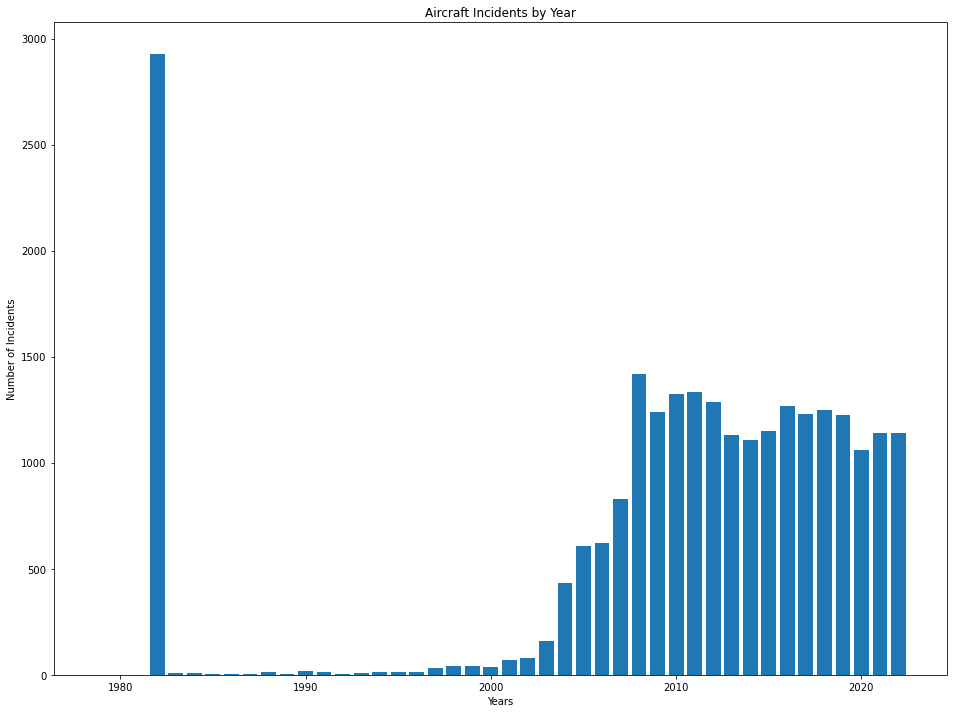

In [72]:
# Now that most of the data cleaning is complete, update the dataframe of incidents by year to understand how the number of incidents vary over time


incidents_by_year = aviation['Event.Year'].value_counts()
incidents_by_year = incidents_by_year.sort_index()
incidents_by_year

# Recreate the graph of number of incidents by year to gauge potential year cutoff points now that more data cleaning has been done

years = list(incidents_by_year.index)
incidents = list(incidents_by_year.values)

fig, ax = plt.subplots(figsize=(16, 12))

ax.bar(years, incidents)
ax.set_title("Aircraft Incidents by Year")
ax.set_ylabel("Number of Incidents")
ax.set_xlabel("Years")

In [73]:
# Keep only records with an Event.Year greater than 2009 in the dataset

"""
We found that the number of airplane accidents by year rise until about 2009 then it remains relatively steady. 
We found a 2019 CNBC article on changes in aircraft safety regulation that seems to back this up. We think 2009 could be a good cut-off point.
https://www.cnbc.com/2019/02/13/colgan-air-crash-10-years-ago-reshaped-us-aviation-safety.html
"""

aviation = aviation[aviation['Event.Year'] > 2009]

Text(0.5, 0, 'Years')

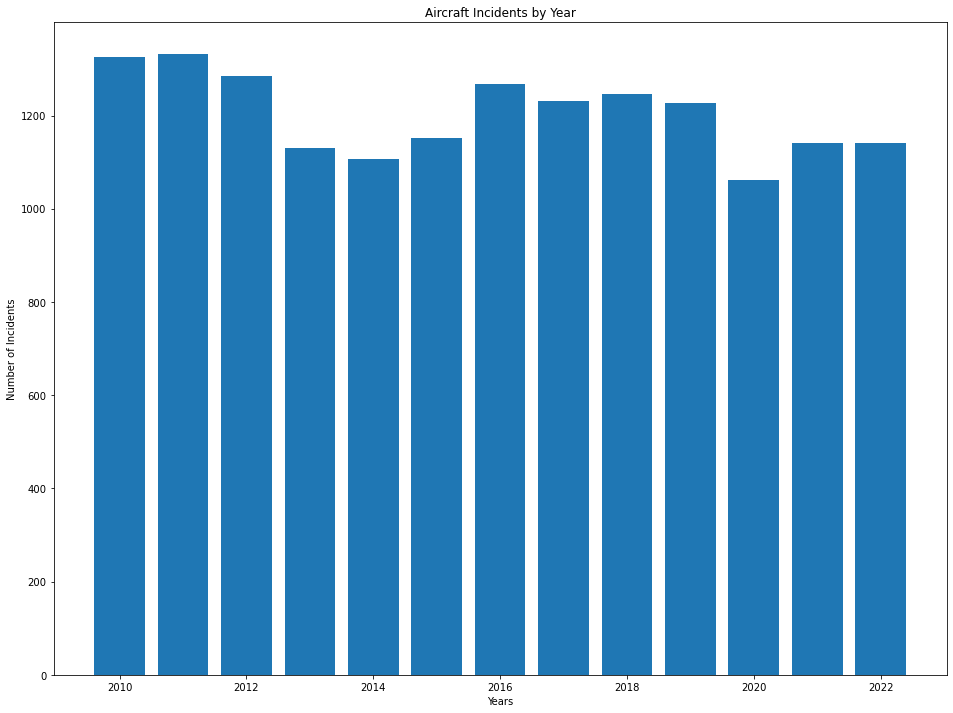

In [74]:
# Now that the dataset only contains only records after 2009, update the dataframe of incidents by year to understand how the number of incidents vary over time

incidents_by_year = aviation['Event.Year'].value_counts()
incidents_by_year = incidents_by_year.sort_index()
incidents_by_year

# Recreate the graph of number of incidents by year to understand how incidents change over time between 2010 and 2022

years = list(incidents_by_year.index)
incidents = list(incidents_by_year.values)

fig, ax = plt.subplots(figsize=(16, 12))

ax.bar(years, incidents)
ax.set_title("Aircraft Incidents by Year")
ax.set_ylabel("Number of Incidents")
ax.set_xlabel("Years")

In [75]:
# Drop the Aircraft.Category column since the only records we kept are airplanes

aviation.drop(columns=['Aircraft.Category'], inplace=True)

In [76]:
# Export the first draft of our master dataset to a CSV

aviation.to_csv('AviationDataClean.csv')

In [77]:
# Understand the breakdown of missing and non-null values in the Make column

aviation['Make'].isna().value_counts()

False    15648
Name: Make, dtype: int64

In [78]:
# Understand the breakdown of the top 29 records in the Make column

aviation['Make'].value_counts()[:29]

Cessna                            5044
Piper                             2964
Beech                             1110
Boeing                            1024
Cirrus                             327
Mooney                             253
Airbus                             242
Air Tractor Inc                    203
Bellanca                           149
Aeronca                            146
Maule                              142
Air Tractor                        128
Embraer                            125
Champion                           118
Luscombe                           103
Stinson                             98
Grumman                             84
North American                      84
Dehavilland                         84
Aviat Aircraft Inc                  69
Diamond Aircraft Ind Inc            65
Aero Commander                      63
Socata                              59
Taylorcraft                         57
Bombardier Inc                      56
Grumman Acft Eng Cor-Schw

---
## Exploratory Data Analysis and Visualizations

Now that we have cleaned the dataset and impute values when possible, we can analyze and visualize the data

In [79]:
# Perform aggregate analysis by grouping by Event.Year and calculating the sum of Total.Fatal.Injuries by Event.Year

aviation.groupby(['Event.Year'])['Total.Fatal.Injuries'].sum()

Event.Year
2010    1150.0
2011     637.0
2012     631.0
2013     610.0
2014    1236.0
2015     924.0
2016     646.0
2017     493.0
2018     829.0
2019     782.0
2020     649.0
2021     407.0
2022     494.0
Name: Total.Fatal.Injuries, dtype: float64

In [80]:
# Perform aggregate analysis by grouping by Event.Year and calculating the sum of Total.Passengers by Event.Year

aviation.groupby(['Event.Year'])['Total.Passengers'].sum()

Event.Year
2010    11991.0
2011    14161.0
2012     9919.0
2013     8786.0
2014    11145.0
2015    10513.0
2016    10906.0
2017    12593.0
2018    12180.0
2019     9715.0
2020     5525.0
2021     7141.0
2022     6899.0
Name: Total.Passengers, dtype: float64

In [81]:
# Perform aggregate analysis by grouping by Make and Event.Year and calculating the sum of Total.Fatal.Injuries for each Make by Event.Year

aviation.groupby(['Make','Event.Year'])['Total.Fatal.Injuries'].sum()

Make            Event.Year
177Mf Llc       2014          0.0
2021Fx3 Llc     2022          0.0
3Xtrim          2015          1.0
737             2022          0.0
777             2021          0.0
                             ... 
Zlin            2018          0.0
                2019          0.0
Zlin Aviation   2020          0.0
Zodiac          2018          1.0
Zuber Thomas P  2021          0.0
Name: Total.Fatal.Injuries, Length: 2157, dtype: float64

In [82]:
# Perform aggregate analysis by grouping by Event.Year and Make and calculating the sum of Total.Fatal.Injuries by Event.Year

aviation.groupby(['Event.Year', 'Make'])['Total.Fatal.Injuries'].sum()

Event.Year  Make                       
2010        Aero Commander                 8.0
            Aero Sp Z O O                  1.0
            Aeronca                        0.0
            Aeropro Cz                     0.0
            Aerostar Acft Corp Of Texas    0.0
                                          ... 
2022        Weatherly Aviation Co Inc      0.0
            William L Bell                 0.0
            Wingren Norman                 0.0
            Yakovlev                       1.0
            Zenith                         0.0
Name: Total.Fatal.Injuries, Length: 2157, dtype: float64

In [83]:
# Create a new dataframe aviation_make_year that show aggregates by grouping by Event.Year and calculating the sum of each of the fields:
# Total.Fatal.Injuries, Total.Serious.Injuries, Total.Minor.Injuries, Total.Uninjured', and Total.Passengers, for each Make by Event.Year

aviation_make_year = aviation.groupby(['Make', 'Event.Year'])['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Total.Passengers'].sum()
aviation_make_year

Total.Fatal.Injuries  Total.Serious.Injuries  \
Make           Event.Year                                                 
177Mf Llc      2014                         0.0                     2.0   
2021Fx3 Llc    2022                         0.0                     0.0   
3Xtrim         2015                         1.0                     0.0   
737            2022                         0.0                     0.0   
777            2021                         0.0                     0.0   
...                                         ...                     ...   
Zlin           2018                         0.0                     0.0   
               2019                         0.0                     0.0   
Zlin Aviation  2020                         0.0                     0.0   
Zodiac         2018                         1.0                     0.0   
Zuber Thomas P 2021                         0.0                     0.0   

                           Total.Minor.Injuries  Total.Uninjured  \
Make           Event.Year                                          
177Mf Llc      2014                         0.0              0.0   
2021Fx3 Llc    2022                         0.0              2.0   
3Xtrim         2015                         1.0              0.0   
737            2022                         0.0            329.0   
777            2021                         0.0              0.0   
...                                         ...              ...   
Zlin           2018                         1.0              1.0   
               2019                         0.0              1.0   
Zlin Aviation  2020                         0.0              1.0   
Zodiac         2018                         1.0              0.0   
Zuber Thomas P 2021                         0.0              1.0   

                           Total.Passengers  
Make           Event.Year                    
177Mf Llc      2014                     2.0  
2021Fx3 Llc    2022                     2.0  
3Xtrim         2015                     2.0  
737            2022                   329.0  
777            2021                     0.0  
...                                     ...  
Zlin           2018                     2.0  
               2019                     1.0  
Zlin Aviation  2020                     1.0  
Zodiac         2018                     2.0  
Zuber Thomas P 2021                     1.0  

[2157 rows x 5 columns]

In [ ]:
# Prefer 'aviation_year_make' dataframe over 'aviation_make_year' dataframe
aviation_year_make = aviation.groupby(['Event.Year', 'Make'])['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Total.Passengers'].sum()
aviation_year_make

In [ ]:
# Add percent fatalities column
aviation_year_make['Percent.Fatalities'] = aviation_year_make['Total.Fatal.Injuries'] / aviation_year_make['Total.Passengers']

In [ ]:
# Create a column for the percent of passengers killed or injured in accident 
aviation_year_make['Percent.Passengers.Harmed'] = (aviation_year_make['Total.Fatal.Injuries'] + aviation_year_make['Total.Minor.Injuries'] + aviation_year_make['Total.Serious.Injuries']) / aviation_year_make['Total.Passengers']

In [ ]:
# Convert the MultiIndex into multiple columns
# https://datatofish.com/index-to-column-pandas-dataframe/

indices = aviation_year_make.index

data = {
        'Total.Fatal.Injuries': aviation_year_make['Total.Fatal.Injuries'].values,
        'Total.Serious.Injuries': aviation_year_make['Total.Serious.Injuries'].values,
        'Total.Minor.Injuries': aviation_year_make['Total.Minor.Injuries'].values,
        'Total.Uninjured': aviation_year_make['Total.Uninjured'].values,
        'Total.Passengers': aviation_year_make['Total.Passengers'].values,
        'Percent.Fatalities': aviation_year_make['Percent.Fatalities'].values,
        'Percent.Passengers.Harmed': aviation_year_make['Percent.Passengers.Harmed'].values
        }

aviation_year_make_transformed = pd.DataFrame(data, columns = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 
                                   'Total.Uninjured', 'Total.Passengers', 'Percent.Fatalities', 'Percent.Passengers.Harmed'], index=indices)

aviation_year_make_transformed.reset_index(inplace=True)

aviation_year_make_transformed

In [ ]:
# Too many makes so I need only a subset
# Stackoverflows: How can I limit to Top 10 'Makes' and plot like this example:

# https://www.statology.org/pandas-groupby-plot/
# https://stackoverflow.com/questions/41494942/pandas-dataframe-groupby-plot

# # Define index column
# aviation_year_make_transformed.set_index('Event.Year', inplace=True)

# # Group data by Make and display Percent.Fatalities as line chart
# aviation_year_make_transformed.groupby('Make')['Percent.Fatalities'].plot(legend=True)

In [ ]:
top_10_makes = list(aviation['Make'].value_counts().index)[:10]
top_5_makes = list(aviation['Make'].value_counts().index)[:5]
commercial = ['Boeing', 'Airbus', 'Embraer']
private = top_10_makes[:3] + top_10_makes[4:6]
private

In [ ]:
top_10_makes_df = aviation_year_make_transformed[aviation_year_make_transformed['Make'].isin(top_10_makes)]
top_5_makes_df = aviation_year_make_transformed[aviation_year_make_transformed['Make'].isin(top_5_makes)]
commercial_df = aviation_year_make_transformed[aviation_year_make_transformed['Make'].isin(commercial)]
private_df = aviation_year_make_transformed[aviation_year_make_transformed['Make'].isin(private)]

In [ ]:
# Define index column
top_10_makes_df.set_index('Event.Year', inplace=True)
top_5_makes_df.set_index('Event.Year', inplace=True)
commercial_df.set_index('Event.Year', inplace=True)
private_df.set_index('Event.Year', inplace=True)

In [ ]:
# https://www.statology.org/pandas-groupby-plot/
# https://stackoverflow.com/questions/41494942/pandas-dataframe-groupby-plot

# Group data by Make and display Percent.Fatalities as line chart
ax = top_10_makes_df.groupby('Make')['Percent.Fatalities'].plot(
    figsize=(20, 10), 
    legend=True,
    title = 'Percent Fatalities by Year',
    xlabel = 'Year',
    ylabel = 'Fatalities/Total Passengers'
    )

In [ ]:
# https://www.statology.org/pandas-groupby-plot/
# https://stackoverflow.com/questions/41494942/pandas-dataframe-groupby-plot

# Group data by Make and display Percent.Passengers.Harmed as line chart
ax = top_10_makes_df.groupby('Make')['Percent.Passengers.Harmed'].plot(
    figsize=(20, 10), 
    legend=True,
    title = 'Percent Passengers Harmed by Year',
    xlabel = 'Year',
    ylabel = 'Passengers Harmed/Total Passengers'
    )

In [ ]:
ax = top_5_makes_df.groupby('Make')['Percent.Fatalities'].plot(
    figsize=(20, 10), 
    legend=True,
    title = 'Percent Fatalities by Year',
    xlabel = 'Year',
    ylabel = 'Fatalities/Total Passengers'
    )

In [ ]:
ax = top_5_makes_df.groupby('Make')['Percent.Passengers.Harmed'].plot(
    figsize=(20, 10), 
    legend=True,
    title = 'Percent Passengers Harmed by Year',
    xlabel = 'Year',
    ylabel = 'Passengers Harmed/Total Passengers'
    )

In [ ]:
ax = commercial_df.groupby('Make')['Percent.Fatalities'].plot(
    figsize=(20, 10), 
    legend=True,
    title = 'Percent Fatalities by Year for Top 3 Commercial Aircraft Manufacturers',
    xlabel = 'Year',
    ylabel = 'Fatalities/Total Passengers'
    )

In [ ]:
ax = commercial_df.groupby('Make')['Percent.Passengers.Harmed'].plot(
    figsize=(20, 10), 
    legend=True,
    title = 'Percent Passengers Harmed by Year for Top 3 Commercial Aircraft Manufacturers',
    xlabel = 'Year',
    ylabel = 'Passengers Harmed/Total Passengers'
    )

In [ ]:
ax = private_df.groupby('Make')['Percent.Fatalities'].plot(
    figsize=(20, 10), 
    legend=True,
    title = 'Percent Fatalities by Year for Top 5 Private Aircraft Manufacturers',
    xlabel = 'Year',
    ylabel = 'Fatalities/Total Passengers'
    )

In [ ]:
ax = private_df.groupby('Make')['Percent.Passengers.Harmed'].plot(
    figsize=(20, 10), 
    legend=True,
    title = 'Percent Passengers Harmed by Year for Top 5 Private Aircraft Manufacturers',
    xlabel = 'Year',
    ylabel = 'Passengers Harmed/Total Passengers'
    )

In [ ]:
# Top make/models (Would need to clean up the Make column)
aviation.groupby(['Make', 'Model'])['Event.Id'].count().sort_values(ascending=False)[:20]

In [ ]:
aviation['Model'].fillna('Unknown', inplace=True)

In [ ]:
top_makes = list(aviation['Make'].value_counts().sort_values(ascending=False).index)[:10]
print(top_makes)

In [ ]:
# Clean Boeing
aviation.loc[(aviation['Make'] == "Boeing") & (aviation['Model'].str.contains('PT', '17')), 'Model'] = "PT-17"
aviation.loc[(aviation['Make'] == "Boeing") & (aviation['Model'].str.contains('737')), 'Model'] = "737"
aviation.loc[(aviation['Make'] == "Boeing") & (aviation['Model'].str.contains('777')), 'Model'] = "777"
aviation.loc[(aviation['Make'] == "Boeing") & (aviation['Model'].str.contains('757')), 'Model'] = "757"
aviation.loc[(aviation['Make'] == "Boeing") & (aviation['Model'].str.contains('767')), 'Model'] = "767"
aviation.loc[(aviation['Make'] == "Boeing") & (aviation['Model'].str.contains('787')), 'Model'] = "787"
aviation.loc[(aviation['Make'] == "Boeing") & (aviation['Model'].str.contains('747')), 'Model'] = "747"
aviation.loc[(aviation['Make'] == "Boeing") & (aviation['Model'].str.contains('727')), 'Model'] = "727"
aviation.loc[(aviation['Make'] == "Boeing") & (aviation['Model'].str.contains('A75')), 'Model'] = "A75"
aviation.loc[(aviation['Make'] == "Boeing") & (aviation['Model'].str.contains('717')), 'Model'] = "717"

In [ ]:
aviation.loc[aviation['Make'] == "Boeing", 'Model'].value_counts()[:20]

In [ ]:
# Clean up Cessna models
aviation.loc[(aviation['Make'] == "Cessna") & (aviation['Model'].str.contains('172')), 'Model'] = "172"
aviation.loc[(aviation['Make'] == "Cessna") & (aviation['Model'].str.contains('170')), 'Model'] = "170"
aviation.loc[(aviation['Make'] == "Cessna") & (aviation['Model'].str.contains('A185')), 'Model'] = "A185"
aviation.loc[(aviation['Make'] == "Cessna") & (aviation['Model'].str.contains('208')), 'Model'] = "208"
aviation.loc[(aviation['Make'] == "Cessna") & (aviation['Model'].str.contains('182')), 'Model'] = "182"
aviation.loc[(aviation['Make'] == "Cessna") & (aviation['Model'].str.contains('150')), 'Model'] = "150"

In [ ]:
aviation.loc[aviation['Make'] == "Cessna", 'Model'].value_counts()[:20]

In [ ]:
# Clean Cirrus Models
aviation.loc[(aviation['Make'] == "Cirrus") & (aviation['Model'].str.contains('SR22')), 'Model'] = "SR22"
aviation.loc[(aviation['Make'] == "Cirrus") & (aviation['Model'].str.contains('SR20')), 'Model'] = "SR20"
aviation.loc[(aviation['Make'] == "Cirrus") & (aviation['Model'].str.contains('SR-22')), 'Model'] = "SR22"

In [ ]:
aviation.loc[aviation['Make'] == "Cirrus", 'Model'].value_counts()[:15]

In [ ]:
# Clean Piper Models 
aviation.loc[(aviation['Make'] == "Piper") & (aviation['Model'].str.contains('PA', '28')), 'Model'] = "PA28"
aviation.loc[(aviation['Make'] == "Piper") & (aviation['Model'].str.contains('J', '3')), 'Model'] = "J3"
aviation.loc[(aviation['Make'] == "Piper") & (aviation['Model'].str.contains('J5')), 'Model'] = "J5"
aviation.loc[(aviation['Make'] == "Piper") & (aviation['Model'].str.contains('L', '21')), 'Model'] = "L21"
aviation.loc[(aviation['Make'] == "Piper") & (aviation['Model'].str.contains('28')), 'Model'] = "PA28"

In [ ]:
aviation.loc[aviation['Make'] == "Piper", 'Model'].value_counts()[:15]

In [ ]:
# Clean Beech Models
aviation.loc[(aviation['Make'] == "Beech") & (aviation['Model'].str.contains('36')), 'Model'] = "36"
aviation.loc[(aviation['Make'] == "Beech") & (aviation['Model'].str.contains('33')), 'Model'] = "33"
aviation.loc[(aviation['Make'] == "Beech") & (aviation['Model'].str.contains('23')), 'Model'] = "23"
aviation.loc[(aviation['Make'] == "Beech") & (aviation['Model'].str.contains('35')), 'Model'] = "35"
aviation.loc[(aviation['Make'] == "Beech") & (aviation['Model'].str.contains('200')), 'Model'] = "200"
aviation.loc[(aviation['Make'] == "Beech") & (aviation['Model'].str.contains('55')), 'Model'] = "55"
aviation.loc[(aviation['Make'] == "Beech") & (aviation['Model'].str.contains('1900')), 'Model'] = "1900"
aviation.loc[(aviation['Make'] == "Beech") & (aviation['Model'].str.contains('58')), 'Model'] = "58"
aviation.loc[(aviation['Make'] == "Beech") & (aviation['Model'].str.contains('100')), 'Model'] = "100"
aviation.loc[(aviation['Make'] == "Beech") & (aviation['Model'].str.contains('E-90')), 'Model'] = "90"
aviation.loc[(aviation['Make'] == "Beech") & (aviation['Model'].str.contains('C90')), 'Model'] = "90"
aviation.loc[(aviation['Make'] == "Beech") & (aviation['Model'].str.contains('E90')), 'Model'] = "90"
aviation.loc[(aviation['Make'] == "Beech") & (aviation['Model'].str.contains('F90')), 'Model'] = "90"
aviation.loc[(aviation['Make'] == "Beech") & (aviation['Model'].str.contains('B90')), 'Model'] = "90"
aviation.loc[(aviation['Make'] == "Beech") & (aviation['Model'].str.contains('300')), 'Model'] = "9300"

In [ ]:
aviation.loc[aviation['Make'] == "Beech", 'Model'].value_counts()[:25]

In [ ]:
# Clean Mooney
aviation.loc[(aviation['Make'] == "Mooney") & (aviation['Model'].str.contains('M20')), 'Model'] = "M20"
aviation.loc[(aviation['Make'] == "Mooney") & (aviation['Model'].str.contains('M-20')), 'Model'] = "M20"
aviation.loc[(aviation['Make'] == "Mooney") & (aviation['Model'].str.contains('M 20')), 'Model'] = "M20"

In [ ]:
aviation.loc[aviation['Make'] == "Mooney", 'Model'].value_counts()[:25]

In [ ]:
# Clean Airbus
aviation.loc[(aviation['Make'] == "Airbus") & (aviation['Model'].str.contains('A320')), 'Model'] = "A320"
aviation.loc[(aviation['Make'] == "Airbus") & (aviation['Model'].str.contains('A330')), 'Model'] = "A330"
aviation.loc[(aviation['Make'] == "Airbus") & (aviation['Model'].str.contains('A321')), 'Model'] = "A321"
aviation.loc[(aviation['Make'] == "Airbus") & (aviation['Model'].str.contains('319')), 'Model'] = "A319"
aviation.loc[(aviation['Make'] == "Airbus") & (aviation['Model'].str.contains('A330')), 'Model'] = "A330"
aviation.loc[(aviation['Make'] == "Airbus") & (aviation['Model'].str.contains('A380')), 'Model'] = "A380"
aviation.loc[(aviation['Make'] == "Airbus") & (aviation['Model'].str.contains('A300')), 'Model'] = "A300"
aviation.loc[(aviation['Make'] == "Airbus") & (aviation['Model'] == '330'), 'Model'] = "A330"
aviation.loc[(aviation['Make'] == "Airbus") & (aviation['Model'] == '321'), 'Model'] = "A321"
aviation.loc[(aviation['Make'] == "Airbus") & (aviation['Model'].str.contains('A310')), 'Model'] = "A310"
aviation.loc[(aviation['Make'] == "Airbus") & (aviation['Model'].str.contains('A340')), 'Model'] = "A340"
aviation.loc[(aviation['Make'] == "Airbus") & (aviation['Model'].str.contains('320')), 'Model'] = "A320"
aviation.loc[(aviation['Make'] == "Airbus") & (aviation['Model'] == '330-200'), 'Model'] = "A330"

In [ ]:
aviation.loc[aviation['Make'] == "Airbus", 'Model'].value_counts()[:25]

In [ ]:
aviation.loc[(aviation['Make'] == "Embraer") & (aviation['Model'].str.contains('190')), 'Model'] = "ERJ190"
aviation.loc[(aviation['Make'] == "Embraer") & (aviation['Model'].str.contains('ERJ 190')), 'Model'] = "ERJ190"
aviation.loc[(aviation['Make'] == "Embraer") & (aviation['Model'].str.contains('145')), 'Model'] = "EMB145"
aviation.loc[(aviation['Make'] == "Embraer") & (aviation['Model'].str.contains('ERJ 170')), 'Model'] = "ERJ170"
aviation.loc[(aviation['Make'] == "Embraer") & (aviation['Model'].str.contains('ERJ170')), 'Model'] = "ERJ170"
aviation.loc[(aviation['Make'] == "Embraer") & (aviation['Model'].str.contains('EMB 145')), 'Model'] = "EMB145"
aviation.loc[(aviation['Make'] == "Embraer") & (aviation['Model'].str.contains('505')), 'Model'] = "EMB505"
aviation.loc[(aviation['Make'] == "Embraer") & (aviation['Model'].str.contains('EMB 135')), 'Model'] = "EMB135"
aviation.loc[(aviation['Make'] == "Embraer") & (aviation['Model'].str.contains('EMB721')), 'Model'] = "EMB721"
aviation.loc[(aviation['Make'] == "Embraer") & (aviation['Model'].str.contains('500')), 'Model'] = "EMB500"
aviation.loc[(aviation['Make'] == "Embraer") & (aviation['Model'].str.contains('135')), 'Model'] = "EMB135"
aviation.loc[(aviation['Make'] == "Embraer") & (aviation['Model'].str.contains('720')), 'Model'] = "EMB720"
aviation.loc[(aviation['Make'] == "Embraer") & (aviation['Model'].str.contains('120')), 'Model'] = "EMB120"
aviation.loc[(aviation['Make'] == "Embraer") & (aviation['Model'].str.contains('175')), 'Model'] = "ERJ175"
aviation.loc[(aviation['Make'] == "Embraer") & (aviation['Model'].str.contains('711')), 'Model'] = "EMB711"
aviation.loc[(aviation['Make'] == "Embraer") & (aviation['Model'].str.contains('810')), 'Model'] = "EMB810"
aviation.loc[(aviation['Make'] == "Embraer") & (aviation['Model'].str.contains('710')), 'Model'] = "EMB710"
aviation.loc[(aviation['Make'] == "Embraer") & (aviation['Model'].str.contains('110')), 'Model'] = "EMB110"
aviation.loc[(aviation['Make'] == "Embraer") & (aviation['Model'].str.contains('202')), 'Model'] = "EMB202"

In [ ]:
aviation.loc[aviation['Make'] == "Embraer", 'Model'].value_counts()[:25]

In [ ]:
aviation.to_csv('AviationDataCleanV2.csv')

In [ ]:
# Normalize two additional company names of top airline manufacturers that we are including in graphs
normalize_company_names(aviation, 'Make', 'Embraer')
normalize_company_names(aviation, 'Make', 'Mooney')

In [ ]:
aviation.to_csv('AviationDataCleanV3.csv')

---

## Appendix

In [ ]:
aviation.pivot_table(index='Make', columns='Event.Year', values='Total.Fatal.Injuries', aggfunc='sum')
aviation.pivot_table(index='Make', columns='Event.Year', values='Total.Serious.Injuries', aggfunc='sum')
aviation.pivot_table(index='Make', columns='Event.Year', values='Total.Minor.Injuries', aggfunc='sum')
aviation.pivot_table(index='Make', columns='Event.Year', values='Total.Uninjured', aggfunc='sum')
aviation.pivot_table(index='Make', columns='Event.Year', values='Total.Passengers', aggfunc='sum')
# Too many blank values for pivot tables to aggregate this way. Better to use 'groupby' aggregation